In [1]:
from PIL import Image

im = Image.open("./../ackley.png")
im1 = Image.open("./../ackley_1.png")
im2 = Image.open("./../ackley_2.png")
im3 = Image.open("./../ackley_3.png")

im.show()
im1.show()
im2.show()
im3.show()


[2:2:0606/150501.426577:ERROR:chrome/browser/process_singleton_posix.cc:346] Failed to create /home/user/.var/app/com.microsoft.Edge/config/microsoft-edge/SingletonSocket: File exists (17)
[2:2:0606/150501.427552:ERROR:chrome/browser/process_singleton_posix.cc:1163] Failed to create symlinks.
Gtk-Message: 15:05:01.540: Failed to load module "canberra-gtk-module"
Gtk-Message: 15:05:01.545: Failed to load module "canberra-gtk-module"
Gtk-Message: 15:05:01.547: Failed to load module "canberra-gtk-module"
Gtk-Message: 15:05:01.548: Failed to load module "canberra-gtk-module"


Opening in existing browser session.
Opening in existing browser session.


[0606/150502.604512:ERROR:third_party/crashpad/crashpad/util/linux/scoped_ptrace_attach.cc:27] ptrace: Operation not permitted (1)
[2:36:0606/150503.872367:ERROR:components/services/storage/service_worker/service_worker_storage.cc:1688] Failed to delete the database: Database IO error
[2:38:0606/150503.978463:ERROR:content/browser/indexed_db/instance/leveldb/backing_store.cc:225] Failed to open LevelDB database from /home/user/.var/app/com.microsoft.Edge/config/microsoft-edge/Default/IndexedDB/chrome-extension_gmgoamodcdcjnbaobigkjelfplakmdhh_0.indexeddb.leveldb,IO error: /home/user/.var/app/com.microsoft.Edge/config/microsoft-edge/Default/IndexedDB/chrome-extension_gmgoamodcdcjnbaobigkjelfplakmdhh_0.indexeddb.leveldb/LOCK: No further details. (ChromeMethodBFE: 15::LockFile::1)
[57:57:0606/150504.403032:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 1 times!
[57:57:0606/150504.409328:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVS

## Упражнение 22.1 (Из ямы на дно)

Перейти от методов локальной оптимизации к глобальной. Требуется найти минимум **функции Экли** второго порядка:

1. Используя один из методов нелинейного программирования (например, метод Нелдера–Мида), используя случайную начальную точку.
2. Используя один из методов эволюционного программирования (например, алгоритм роя частиц).

Сравните число вычислений функции, используемое для нахождения минимума. Постройте график целевой функции и нанесите на него путь оптимизации.


In [349]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from pyswarm import pso
import warnings
warnings.filterwarnings('ignore')

Константы

In [350]:

nm_path = []
pso_path = []
bounds = [(-32.768, 32.768), (-32.768, 32.768)]

Функция Экли

In [351]:
# Обёртка Ackley для PSO, сохраняем точки вызова
def ackley_with_trace(x, a=20, b=0.2, c=2*np.pi):
    x = np.asarray(x)
    if x.ndim == 1:
        pso_path.append(x.copy())
    else:
        for xi in x:
            pso_path.append(np.array(xi))
    d = x.shape[-1]
    sum1 = np.sum(x**2, axis=-1)
    sum2 = np.sum(np.cos(c * x), axis=-1)
    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)
    return term1 + term2 + a + np.e

# Основная Ackley без записи 
def ackley(x, a=20, b=0.2, c=2*np.pi):
    x = np.asarray(x)
    d = x.shape[-1]
    sum1 = np.sum(x**2, axis=-1)
    sum2 = np.sum(np.cos(c * x), axis=-1)
    term1 = -a * np.exp(-b * np.sqrt(sum1 / d))
    term2 = -np.exp(sum2 / d)
    return term1 + term2 + a + np.e

Метод Нелдер-Мида с случайной точкой

In [352]:

np.random.seed(42)
start_point = np.random.uniform(bounds[0][0], bounds[0][1], size=2)


def nm_callback(xk):
    nm_path.append(xk.copy())

nm_result = minimize(ackley, x0=start_point, method='Nelder-Mead',
                     callback=nm_callback,
                     options={'maxfev': 1000, 'xatol': 1e-8, 'disp': True})

nm_path = [start_point] + nm_path  

Optimization terminated successfully.
         Current function value: 19.783880
         Iterations: 61
         Function evaluations: 121


Метод PSO

In [353]:
lb = [b[0] for b in bounds]
ub = [b[1] for b in bounds]
pso_result, pso_val = pso(ackley_with_trace, lb, ub, swarmsize=20, maxiter=100, debug=False)

Stopping search: Swarm best objective change less than 1e-08


Обработка координат и визуализация

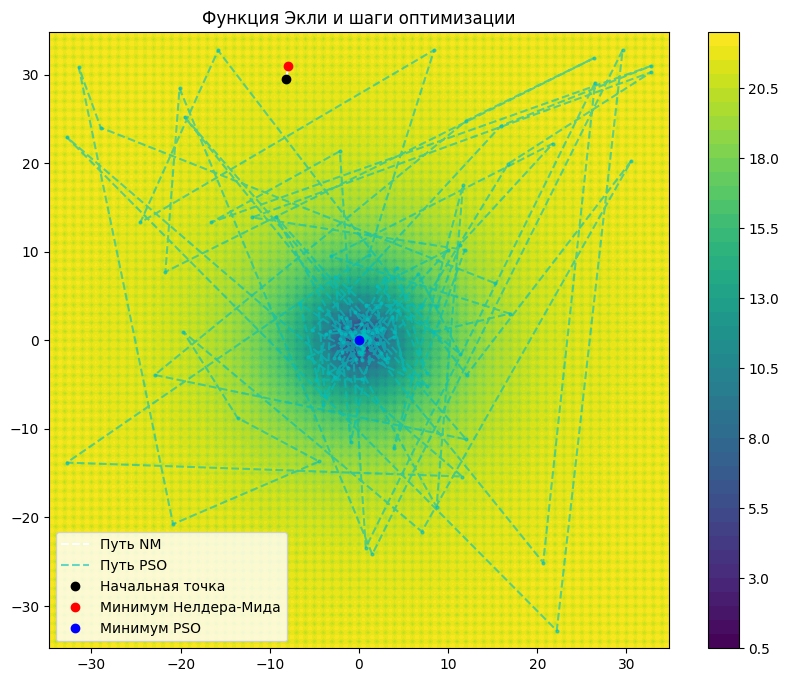

In [354]:

start_point = np.array(start_point)
nm_min = np.array(nm_result.x)
pso_min = np.array(pso_result)
global_min = np.array([0, 0])

nm_path = np.array(nm_path)
pso_path = np.array(pso_path)

# Определим диапазон графика
all_points = np.vstack([nm_path, pso_path, global_min])
margin = 2
x_min = np.min(all_points[:, 0]) - margin
x_max = np.max(all_points[:, 0]) + margin
y_min = np.min(all_points[:, 1]) - margin
y_max = np.max(all_points[:, 1]) + margin

# Сетка
X, Y = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
Z = ackley(np.stack([X, Y], axis=-1))

# Визуализация
fig, ax = plt.subplots(figsize=(10, 8))
cp = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(cp)

# Путь Nelder-Mead
ax.plot(nm_path[:, 0], nm_path[:, 1], 'w--', label='Путь NM')
ax.plot(nm_path[:, 0], nm_path[:, 1], 'wo', markersize=3)

# Путь PSO (сильно много точек — прорежаем)
if len(pso_path) > 1000:
    pso_path_vis = pso_path[::len(pso_path)//500]
else:
    pso_path_vis = pso_path
ax.plot(pso_path_vis[:, 0], pso_path_vis[:, 1], 'c--', label='Путь PSO', alpha=0.6)
ax.plot(pso_path_vis[:, 0], pso_path_vis[:, 1], 'co', markersize=2, alpha=0.6)

# Точки
ax.plot(start_point[0], start_point[1], 'ko', label='Начальная точка')
ax.plot(nm_min[0], nm_min[1], 'ro', label='Минимум Нелдера-Мида')
ax.plot(pso_min[0], pso_min[1], 'bo', label='Минимум PSO')

# Настройки
ax.set_title('Функция Экли и шаги оптимизации')
ax.legend()
plt.show()

Упражнение 22.2 (Дорабатываем напильником) Исследовать функцию Растрыгина 3 порядка. Для одного алгоритма на выбор для фиксированных параметров seed-random и начальной точки изменять параметры алгоритма, для получения глобального минимума с наименьшим числом итераций. Построить таблицу со значениями параметров и количества вычислений функции для достижения глобального оптимума.


Метод имитации отжига
 - temperature Initial value for temperature.
 - visiting.param Parameter for visiting distribution.
 - acceptance.param Parameter for acceptance distribution.


Метод роя частиц
 - s The swarm size.
 - k The exponent for calculating number of informants.
 - p The average percentage of informants for each particle. A value of 1 implies that all particles are fully informed.
 - w The exploitation constant.
 - c.p The local exploration constant.
 - c.g The global exploration constant.
 - d The diameter of the search space.
 - v.max The maximal (euclidean) length of the velocity vector.


Генетический алгоритм
 - popSize The population size.
 - pcrossover The probability of crossover between pairs of chromosomes.
 - pmutation The probability of mutation in a parent chromosome. Usually mutation occurs with a small probability.
 - elitism The number of best fitness individuals to survive at each generation.

### функцию Растрыгина:
$$
f(\mathbf{x}) = 10d + \sum_{i=1}^{d} \left[ x_i^2 - 10 \cos(2\pi x_i) \right]
$$

### Description:
- **Dimensions**: $ d $
- The Rastrigin function has several local minima. It is highly multimodal, but the locations of the minima are regularly distributed. It is shown in the plot above in its two-dimensional form.

### Input Domain:
- The function is usually evaluated on the hypercube $ x_i \in [-5.12, 5.12] $, for all $ i = 1, \dots, d $.

### Global Minimum:
- $ f(\mathbf{x}^*) = 0 $, at $ \mathbf{x}^* = (0, \dots, 0) $


In [2]:
# from PIL import Image

# im = Image.open(r"./../image.png")
# im1 = Image.open(r"./../image1.png")
# im2 = Image.open(r"./../image2.png")

# im.show()
# im1.show()
# im2.show()

# im.close()
# im1.close()
# im2.close()

Gtk-Message: 15:06:53.300: Failed to load module "canberra-gtk-module"
Gtk-Message: 15:06:53.304: Failed to load module "canberra-gtk-module"


Opening in existing browser session.
Opening in existing browser session.


[59:59:0606/150655.795555:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 1 times!
[59:59:0606/150655.805095:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 2 times!
[59:59:0606/150658.017206:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 3 times!


In [356]:
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
from itertools import product


np.random.seed(42)

def rastrigin(x):
    d = len(x)
    return 10 * d + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

lower = np.array([-5.12, -5.12, -5.12])
upper = np.array([5.12, 5.12, 5.12])
global_opt = np.array([0.0, 0.0, 0.0])
start_point = np.random.uniform(lower, upper, 3)

print("=== ФУНКЦИЯ РАСТРЫГИНА 3-го ПОРЯДКА ===")
print(f"Размерность: 3")
print(f"Область определения: [{lower[0]}, {upper[0]}]³")
print(f"Глобальный минимум: f({global_opt}) = 0")
print(f"Начальная точка: {start_point}")

# popsize_values = [5, 10, 30]
# mutation_values = [0.1, 0.3, 0.9]
# recombination_values = [0.1, 0.3, 0.9]
# strategy_values = ['rand1bin', 'rand2bin', 'currenttobest1bin']

popsize_values = [5]
mutation_values = [0.1]
recombination_values = [0.1]
strategy_values = ['rand2bin']
# Параметры: PS=5, M=0.1, R=0.1, S=rand2bin
#   Вызовов функции: 841
  
params_combinations = list(product(
    popsize_values,
    mutation_values,
    recombination_values,
    strategy_values
))

print(f"Общее количество комбинаций параметров: {len(params_combinations)}")

results = []

class FunctionCallCounter:
    def __init__(self, func):
        self.func = func
        self.count = 0
        
    def __call__(self, x):
        self.count += 1
        return self.func(x)
    
    def reset(self):
        self.count = 0

counter = FunctionCallCounter(rastrigin)

print("\n=== ЗАПУСК ГЕНЕТИЧЕСКОГО АЛГОРИТМА ===")

def early_stop_callback(xk, convergence):
    current_value = rastrigin(xk)
    
    if current_value < 1e-6: 
        print(f"  *** РАННЯЯ ОСТАНОВКА: f={current_value:.2e} ***")
        return True  
    
    return False 

for i, (popsize, mutation, recombination, strategy) in enumerate(params_combinations):
    print(f"Эксперимент {i+1}/{len(params_combinations)}")
    
    counter.reset()

    result = differential_evolution(
        counter,
        bounds=list(zip(lower, upper)),
        strategy=strategy,
        maxiter=300,
        popsize=popsize,
        mutation=mutation,
        recombination=recombination,
        callback=early_stop_callback, 
        tol=1e-6,
        atol=1e-8,
        seed=42
    )

    
    global_distance = np.linalg.norm(result.x - global_opt)
    success = global_distance < 1e-6 and result.fun < 1e-6
    
    results.append({
        'popsize': popsize,
        'mutation': mutation,
        'recombination': recombination,
        'strategy': strategy,
        'call_count': counter.count,
        'final_value': result.fun,
        'global_distance': global_distance,
        'success': success,
        'final_point': result.x.copy(),
        'nit': result.nit,
        'nfev': result.nfev
    })
    
    print(f"  Параметры: PS={popsize}, M={mutation}, R={recombination}, S={strategy}")
    print(f"  Вызовов функции: {counter.count}")
    print(f"  Финальное значение: {result.fun:.8f}")
    print(f"  Расстояние до оптимума: {global_distance:.8f}")
    print(f"  Успех: {success}")
    print(f"  Итераций: {result.nit}")

=== ФУНКЦИЯ РАСТРЫГИНА 3-го ПОРЯДКА ===
Размерность: 3
Область определения: [-5.12, 5.12]³
Глобальный минимум: f([0. 0. 0.]) = 0
Начальная точка: [-1.28470918  4.6153145   2.37561796]
Общее количество комбинаций параметров: 1

=== ЗАПУСК ГЕНЕТИЧЕСКОГО АЛГОРИТМА ===
Эксперимент 1/1
  *** РАННЯЯ ОСТАНОВКА: f=4.29e-07 ***
  Параметры: PS=5, M=0.1, R=0.1, S=rand2bin
  Вызовов функции: 841
  Финальное значение: 0.00000000
  Расстояние до оптимума: 0.00000001
  Успех: True
  Итераций: 54


[RESULT TABLE](https://docs.google.com/spreadsheets/d/14y1MJHBytmBJXwIBQO6aeoDmVxZ4PRFUisPlBrwVTqQ/edit?gid=278814397#gid=278814397)

### Schwefel Function

**Source**: R/sof.schwefel.R

Highly multimodal test function. The curious thing about this function is that the global optimum is far away from the next best local optimum. The function is computed via:

$$
f(\mathbf{x}) = \sum_{i=1}^{n} -x_i \sin\left(\sqrt{|x_i|}\right)
$$

with $ x_i \in [-500, 500] $, $ i = 1, \dots, n $.

```makeSchwefelFunction(dimensions)```

### Arguments

- **dimensions**
  - `[integer(1)]`
  - Size of the corresponding parameter space.

### Value

- `[smoof_single_objective_function]`

### References

Schwefel, H.-P.: Numerical optimization of computer models. Chichester: Wiley & Sons, 1981.

In [3]:
from PIL import Image

im = Image.open("./../schwefel.png")

im.show()

Gtk-Message: 15:09:56.141: Failed to load module "canberra-gtk-module"
Gtk-Message: 15:09:56.145: Failed to load module "canberra-gtk-module"
[58:58:0606/150959.008896:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 1 times!
[58:58:0606/150959.014248:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 2 times!
[58:58:0606/151001.231073:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 3 times!


=== ФУНКЦИЯ ШВЕФЕЛЯ 3-го ПОРЯДКА ===
Размерность: 3
Область определения: [-500, 500]³
Глобальный минимум: f([420.9687 420.9687 420.9687]) = -1256.948662

Случайные начальные точки:
      x1       x2       x3
-125.460  450.714  231.994
  98.658 -343.981 -344.005
-441.916  366.176  101.115
 208.073 -479.416  469.910
 332.443 -287.661 -318.175
-316.595 -195.758   24.756
 -68.055 -208.771  111.853
-360.506 -207.855 -133.638
 -43.930  285.176 -300.326
  14.234   92.415 -453.550
 107.545 -329.476 -434.948
 448.886  465.632  308.397
-195.386 -402.328  184.233
 -59.848 -377.962   -4.823
-465.611  409.320 -241.220

=== ЗАПУСК ЭКСПЕРИМЕНТОВ ===
Эксперимент 1/15
  SimulatedAnnealing: f=-1256.948662, вызовов=6093
      Использование GeneticAlgorithm: f=-1138.510327, вызовов=1006
Эксперимент 2/15
  SimulatedAnnealing: f=-1256.948662, вызовов=6093
      Использование GeneticAlgorithm: f=-1256.948662, вызовов=1006
Эксперимент 3/15
  SimulatedAnnealing: f=-1256.948662, вызовов=6109
      Использование

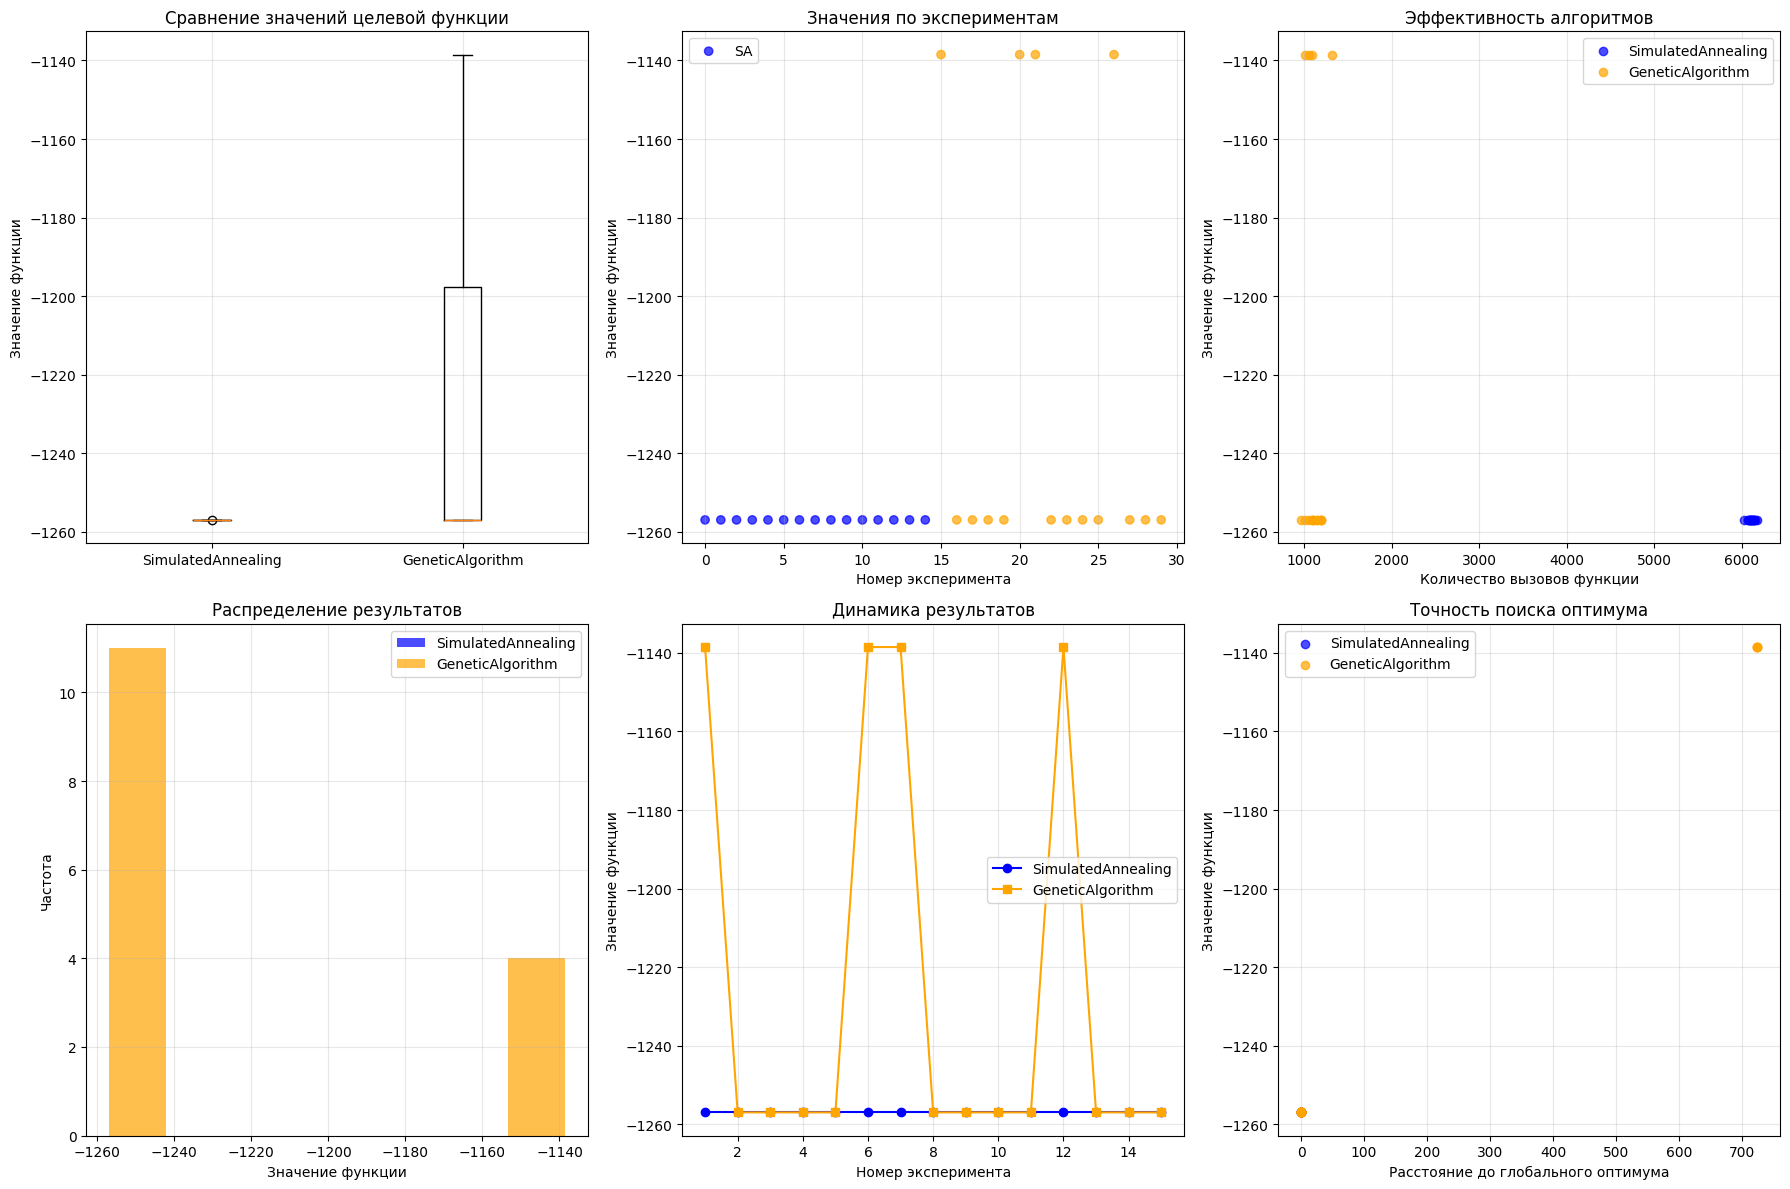


=== АНАЛИЗ ФАКТОРОВ ВЛИЯНИЯ ===
Успешных решений:
  SimulatedAnnealing: 15/15 (100.0%)
  GeneticAlgorithm: 11/15 (73.3%)

Среднее количество вызовов функции:
  SimulatedAnnealing: 6110
  GeneticAlgorithm: 1106

Расстояние до глобального оптимума:
  SimulatedAnnealing: среднее=0.000, медиана=0.000
  GeneticAlgorithm: среднее=192.932, медиана=0.000

=== ВЛИЯНИЕ НАЧАЛЬНОЙ ТОЧКИ ===
Корреляция между расстоянием начальной точки и результатом:
  SimulatedAnnealing: -0.632
  GeneticAlgorithm: -0.658

=== ЛУЧШИЕ РЕЗУЛЬТАТЫ ===
SimulatedAnnealing (эксперимент 14):
  Значение функции: -1256.948662
  Количество вызовов: 6177
  Начальная точка: [ -59.84750626 -377.96176516   -4.82308989]

GeneticAlgorithm (эксперимент 13):
  Значение функции: -1256.948662
  Количество вызовов: 961
  Начальная точка: [-195.38623083 -402.32788599  184.23302651]

Глобальный минимум функции Швефеля: -1256.948662


In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import dual_annealing, differential_evolution
from scipy.stats import ttest_ind


np.random.seed(42)

def schwefel(x):
    return np.sum(-x * np.sin(np.sqrt(np.abs(x))))

lower = np.array([-500, -500, -500])
upper = np.array([500, 500, 500])
global_opt = np.array([420.9687, 420.9687, 420.9687])
global_min_value = schwefel(global_opt)

print("=== ФУНКЦИЯ ШВЕФЕЛЯ 3-го ПОРЯДКА ===")
print(f"Размерность: 3")
print(f"Область определения: [{lower[0]}, {upper[0]}]³")
print(f"Глобальный минимум: f({global_opt}) = {global_min_value:.6f}")

n_experiments = 15

np.random.seed(42)
random_points = []
for i in range(n_experiments):
    point = np.random.uniform(lower, upper, 3)
    random_points.append(point)

random_points_df = pd.DataFrame(random_points, columns=['x1', 'x2', 'x3'])
print(f"\nСлучайные начальные точки:")
print(random_points_df.to_string(index=False, float_format='%.3f'))


def run_simulated_annealing(start_point, id):
    counter = FunctionCallCounter(schwefel)
    
    unique_seed = 42 + id
    
    result = dual_annealing(
        counter,
        bounds=list(zip(lower, upper)),
        x0=start_point,
        maxiter=1000,
        initial_temp=500,
        restart_temp_ratio=1e-5,
        visit=2.5,
        accept=-3,
        seed=unique_seed
    )
        
    global_distance = np.linalg.norm(result.x - global_opt)
        
    return {
        'algorithm': 'SimulatedAnnealing',
        'start_point': start_point.copy(),
        'final_point': result.x.copy(),
        'value': result.fun,
        'call_count': counter.count,
        'global_distance': global_distance,
        'success': result.success and global_distance < 10.0,
        'nit': result.nit
    }

def run_genetic_algorithm(start_point, id):
    counter = FunctionCallCounter(schwefel)
    
    unique_seed = 42 + id
    
    result = differential_evolution(
        counter,
        bounds=list(zip(lower, upper)),
        strategy='best1bin',
        maxiter=1000,
        popsize=15,
        mutation=0.5,
        recombination=0.7,
        seed=unique_seed,
        init='random',
        tol=1e-6,
        atol=1e-8
    )
    
    global_distance = np.linalg.norm(result.x - global_opt)
    
    return {
        'algorithm': 'GeneticAlgorithm',
        'start_point': start_point.copy(),
        'final_point': result.x.copy(),
        'value': result.fun,
        'call_count': counter.count,
        'global_distance': global_distance,
        'success': result.success and global_distance < 10.0,
        'nit': result.nit
    }

print(f"\n=== ЗАПУСК ЭКСПЕРИМЕНТОВ ===")

sa_results = []
ga_results = []

for i in range(n_experiments):
    print(f"Эксперимент {i+1}/{n_experiments}")
    
    sa_result = run_simulated_annealing(random_points[i], i)
    print(f"  SimulatedAnnealing: f={sa_result['value']:.6f}, вызовов={sa_result['call_count']}")
    sa_results.append(sa_result)
    
    ga_result = run_genetic_algorithm(random_points[i], i)
    print(f"      Использование GeneticAlgorithm: f={ga_result['value']:.6f}, вызовов={ga_result['call_count']}")
    ga_results.append(ga_result)

sa_df = pd.DataFrame(sa_results)
ga_df = pd.DataFrame(ga_results)

results_list = []
for i, (sa_res, ga_res) in enumerate(zip(sa_results, ga_results)):
    results_list.append({
        'experiment': i+1,
        'algorithm': 'SimulatedAnnealing',
        'value': sa_res['value'],
        'calls': sa_res['call_count'],
        'distance': sa_res['global_distance'],
        'success': sa_res['success']
    })
    results_list.append({
        'experiment': i+1,
        'algorithm': 'GeneticAlgorithm', 
        'value': ga_res['value'],
        'calls': ga_res['call_count'],
        'distance': ga_res['global_distance'],
        'success': ga_res['success']
    })

results_df = pd.DataFrame(results_list)

print(f"\n=== ТАБЛИЦА РЕЗУЛЬТАТОВ ===")
pivot_table = results_df.pivot_table(
    index='experiment', 
    columns='algorithm', 
    values=['value', 'calls', 'distance'], 
    aggfunc='first'
)
print(pivot_table.to_string(float_format='%.2e'))

sa_values = np.array([r['value'] for r in sa_results])
ga_values = np.array([r['value'] for r in ga_results])

print(f"\n=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ===")
print(f"SimulatedAnnealing:")
print(f"  Среднее значение: {np.mean(sa_values):.6f}")
print(f"  Стандартное отклонение: {np.std(sa_values, ddof=1):.6f}")
print(f"  Минимум: {np.min(sa_values):.6f}")
print(f"  Максимум: {np.max(sa_values):.6f}")

print(f"\nGeneticAlgorithm:")
print(f"  Среднее значение: {np.mean(ga_values):.6f}")
print(f"  Стандартное отклонение: {np.std(ga_values, ddof=1):.6f}")
print(f"  Минимум: {np.min(ga_values):.6f}")
print(f"  Максимум: {np.max(ga_values):.6f}")

t_stat, p_value = ttest_ind(sa_values, ga_values)

print(f"\n=== T-ТЕСТ СТЬЮДЕНТА ===")
print(f"H0: Средние значения алгоритмов равны")
print(f"H1: Средние значения алгоритмов различны")
print(f"T-статистика: {t_stat:.6f}")
print(f"P-значение: {p_value:.6f}")
print(f"Уровень значимости: α = 0.05")

if p_value < 0.05:
    print(f"ЗАКЛЮЧЕНИЕ: p < 0.05 → Отвергаем H0")
    print(f"Различие между алгоритмами статистически значимо")
    if np.mean(sa_values) < np.mean(ga_values):
        print(f"SimulatedAnnealing показывает лучшие результаты")
    else:
        print(f"GeneticAlgorithm показывает лучшие результаты")
else:
    print(f"ЗАКЛЮЧЕНИЕ: p ≥ 0.05 → Не отвергаем H0")
    print(f"Различие может быть обусловлено случайными отклонениями")

effect_size = abs(np.mean(sa_values) - np.mean(ga_values)) / np.sqrt((np.var(sa_values, ddof=1) + np.var(ga_values, ddof=1)) / 2)
print(f"\nРазмер эффекта (Cohen's d): {effect_size:.3f}")
if effect_size < 0.2:
    print("Малый эффект")
elif effect_size < 0.5:
    print("Средний эффект")
else:
    print("Большой эффект")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0, 0].boxplot([sa_values, ga_values], labels=['SimulatedAnnealing', 'GeneticAlgorithm'])
axes[0, 0].set_ylabel('Значение функции')
axes[0, 0].set_title('Сравнение значений целевой функции')
axes[0, 0].grid(True, alpha=0.3)

values_combined = np.concatenate([sa_values, ga_values])
algorithms_combined = ['SA'] * len(sa_values) + ['GA'] * len(ga_values)
colors = ['blue' if alg == 'SA' else 'orange' for alg in algorithms_combined]

axes[0, 1].scatter(range(len(values_combined)), values_combined, c=colors, alpha=0.7)
axes[0, 1].set_xlabel('Номер эксперимента')
axes[0, 1].set_ylabel('Значение функции')
axes[0, 1].set_title('Значения по экспериментам')
axes[0, 1].legend(['SA', 'GA'])
axes[0, 1].grid(True, alpha=0.3)

sa_calls = np.array([r['call_count'] for r in sa_results])
ga_calls = np.array([r['call_count'] for r in ga_results])

axes[0, 2].scatter(sa_calls, sa_values, alpha=0.7, label='SimulatedAnnealing', color='blue')
axes[0, 2].scatter(ga_calls, ga_values, alpha=0.7, label='GeneticAlgorithm', color='orange')
axes[0, 2].set_xlabel('Количество вызовов функции')
axes[0, 2].set_ylabel('Значение функции')
axes[0, 2].set_title('Эффективность алгоритмов')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

axes[1, 0].hist(sa_values, bins=8, alpha=0.7, label='SimulatedAnnealing', color='blue')
axes[1, 0].hist(ga_values, bins=8, alpha=0.7, label='GeneticAlgorithm', color='orange')
axes[1, 0].set_xlabel('Значение функции')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение результатов')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

experiments = range(1, n_experiments + 1)
axes[1, 1].plot(experiments, sa_values, 'o-', label='SimulatedAnnealing', color='blue')
axes[1, 1].plot(experiments, ga_values, 's-', label='GeneticAlgorithm', color='orange')
axes[1, 1].set_xlabel('Номер эксперимента')
axes[1, 1].set_ylabel('Значение функции')
axes[1, 1].set_title('Динамика результатов')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

sa_distances = np.array([r['global_distance'] for r in sa_results])
ga_distances = np.array([r['global_distance'] for r in ga_results])

axes[1, 2].scatter(sa_distances, sa_values, alpha=0.7, label='SimulatedAnnealing', color='blue')
axes[1, 2].scatter(ga_distances, ga_values, alpha=0.7, label='GeneticAlgorithm', color='orange')
axes[1, 2].set_xlabel('Расстояние до глобального оптимума')
axes[1, 2].set_ylabel('Значение функции')
axes[1, 2].set_title('Точность поиска оптимума')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== АНАЛИЗ ФАКТОРОВ ВЛИЯНИЯ ===")

sa_successes = sum([r['success'] for r in sa_results])
ga_successes = sum([r['success'] for r in ga_results])

print(f"Успешных решений:")
print(f"  SimulatedAnnealing: {sa_successes}/{n_experiments} ({sa_successes/n_experiments*100:.1f}%)")
print(f"  GeneticAlgorithm: {ga_successes}/{n_experiments} ({ga_successes/n_experiments*100:.1f}%)")

print(f"\nСреднее количество вызовов функции:")
print(f"  SimulatedAnnealing: {np.mean(sa_calls):.0f}")
print(f"  GeneticAlgorithm: {np.mean(ga_calls):.0f}")

print(f"\nРасстояние до глобального оптимума:")
print(f"  SimulatedAnnealing: среднее={np.mean(sa_distances):.3f}, медиана={np.median(sa_distances):.3f}")
print(f"  GeneticAlgorithm: среднее={np.mean(ga_distances):.3f}, медиана={np.median(ga_distances):.3f}")

start_points_influence = []
for i in range(n_experiments):
    start_point = random_points[i]
    start_distance = np.linalg.norm(start_point - global_opt)
    
    start_points_influence.append({
        'experiment': i+1,
        'start_distance': start_distance,
        'sa_value': sa_results[i]['value'],
        'ga_value': ga_results[i]['value'],
        'sa_success': sa_results[i]['success'],
        'ga_success': ga_results[i]['success']
    })

influence_df = pd.DataFrame(start_points_influence)

correlation_sa = np.corrcoef(influence_df['start_distance'], influence_df['sa_value'])[0, 1]
correlation_ga = np.corrcoef(influence_df['start_distance'], influence_df['ga_value'])[0, 1]

print(f"\n=== ВЛИЯНИЕ НАЧАЛЬНОЙ ТОЧКИ ===")
print(f"Корреляция между расстоянием начальной точки и результатом:")
print(f"  SimulatedAnnealing: {correlation_sa:.3f}")
print(f"  GeneticAlgorithm: {correlation_ga:.3f}")

def optimize_parameters():
    print(f"\n=== ОПТИМИЗАЦИЯ ПАРАМЕТРОВ ===")
    
    best_point = global_opt + np.random.normal(0, 50, 3)
    print(f"Попытка с точкой близкой к оптимуму: {best_point}")
    
    sa_optimized = run_simulated_annealing(best_point, 1)
    ga_optimized = run_genetic_algorithm(best_point, 1)
    
    print(f"Результаты с оптимизированной начальной точкой:")
    print(f"  SimulatedAnnealing: f={sa_optimized['value']:.6f}, вызовов={sa_optimized['call_count']}")
    print(f"  GeneticAlgorithm: f={ga_optimized['value']:.6f}, вызовов={ga_optimized['call_count']}")
    
    return sa_optimized, ga_optimized

best_sa_idx = np.argmin(sa_values)
best_ga_idx = np.argmin(ga_values)

print(f"\n=== ЛУЧШИЕ РЕЗУЛЬТАТЫ ===")
print(f"SimulatedAnnealing (эксперимент {best_sa_idx+1}):")
print(f"  Значение функции: {sa_results[best_sa_idx]['value']:.6f}")
print(f"  Количество вызовов: {sa_results[best_sa_idx]['call_count']}")
print(f"  Начальная точка: {sa_results[best_sa_idx]['start_point']}")

print(f"\nGeneticAlgorithm (эксперимент {best_ga_idx+1}):")
print(f"  Значение функции: {ga_results[best_ga_idx]['value']:.6f}")
print(f"  Количество вызовов: {ga_results[best_ga_idx]['call_count']}")
print(f"  Начальная точка: {ga_results[best_ga_idx]['start_point']}")

print(f"\nГлобальный минимум функции Швефеля: {global_min_value:.6f}")

### SCHAFFER FUNCTION N. 2

#### Description:
$$
f(\mathbf{x}) = 0.5 + \frac{\sin^2(x_1^2 - x_2^2) - 0.5}{[1 + 0.001(x_1^2 + x_2^2)]^2}
$$

**Dimensions**: 2

The second Schaffer function. It is shown on a smaller input domain in the second plot to show detail.

#### Input Domain:
The function is usually evaluated on the square $ x_i \in [-100, 100] $, for all $ i = 1, 2 $.

#### Global Minimum:
$$
f(\mathbf{x}^*) = 0, \text{ at } \mathbf{x}^* = (0, 0)
$$

Критерий Фишера — статистический критерий для оценки значимости различия дисперсий двух случайных выборок. Для этого вычисляется F-статистика, равная F=D1/D2, где D1 — большая дисперсия, D2 — меньшая дисперсия.

Статистика теста так или иначе сводится к отношению выборочных дисперсий (сумм квадратов, деленных на число степеней свободы). Чтобы статистика имела распределение Фишера, необходимо, чтобы числитель и знаменатель были независимыми случайными величинами и соответствующие суммы квадратов имели распределение Хи-квадрат. Для этого требуется, чтобы данные имели нормальное распределение. Кроме того, предполагается, что дисперсия случайных величин, квадраты которых суммируются, одинакова.

Если полученное значение F-статистики больше критического для определенного уровня значимости и соответствующих чисел степеней свободы для числителя и знаменателя, то дисперсии считаются значимо различающимися. В Data Mining применяется для оценки значимости регрессионных моделей.

[source](https://wiki.loginom.ru/articles/f-test.html)

In [4]:
# from PIL import Image
# import warnings
# warnings.filterwarnings('ignore')

# im1 = Image.open('./../schaffer.png')
# im2 = Image.open('./../schaffer_1.png')
# im3 = Image.open('./../schaffer_2.png')

# im1.show()
# im2.show()
# im3.show()


[2:2:0606/151229.008806:ERROR:chrome/browser/process_singleton_posix.cc:346] Failed to create /home/user/.var/app/com.microsoft.Edge/config/microsoft-edge/SingletonSocket: File exists (17)
[2:2:0606/151229.009614:ERROR:chrome/browser/process_singleton_posix.cc:1163] Failed to create symlinks.
Gtk-Message: 15:12:29.133: Failed to load module "canberra-gtk-module"
Gtk-Message: 15:12:29.134: Failed to load module "canberra-gtk-module"
Gtk-Message: 15:12:29.136: Failed to load module "canberra-gtk-module"
Gtk-Message: 15:12:29.136: Failed to load module "canberra-gtk-module"


Opening in existing browser session.


[0606/151230.394998:ERROR:third_party/crashpad/crashpad/util/linux/scoped_ptrace_attach.cc:27] ptrace: Operation not permitted (1)
[2:36:0606/151231.534067:ERROR:components/services/storage/service_worker/service_worker_storage.cc:1688] Failed to delete the database: Database IO error
[2:95:0606/151231.679493:ERROR:content/browser/indexed_db/instance/leveldb/backing_store.cc:225] Failed to open LevelDB database from /home/user/.var/app/com.microsoft.Edge/config/microsoft-edge/Default/IndexedDB/chrome-extension_gmgoamodcdcjnbaobigkjelfplakmdhh_0.indexeddb.leveldb,IO error: /home/user/.var/app/com.microsoft.Edge/config/microsoft-edge/Default/IndexedDB/chrome-extension_gmgoamodcdcjnbaobigkjelfplakmdhh_0.indexeddb.leveldb/LOCK: No further details. (ChromeMethodBFE: 15::LockFile::1)
[59:59:0606/151232.213079:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVSyncParametersIfAvailable() failed for 1 times!
[59:59:0606/151232.211927:ERROR:ui/gl/gl_surface_presentation_helper.cc:260] GetVS

=== ФУНКЦИЯ ШАФЕРА N2 ===
Размерность: 2
Область определения: [-100, 100]²
Глобальный минимум: f([0. 0.]) = 0.000000

=== ЗАПУСК ЭКСПЕРИМЕНТОВ С ГЕНЕТИЧЕСКИМ АЛГОРИТМОМ ===

Запуск GA с параметрами 'conservative':
  Размер популяции: 15
  Мутация: 0.3
  Кроссовер: 0.7
  Стратегия: best1bin
  Успешных запусков: 0/15 (0.0%)
  Сошедшихся запусков: 15/15 (100.0%)
  Среднее значение функции: 0.00000000
  Стандартное отклонение: 0.00000000
  Среднее количество вызовов: 697

Запуск GA с параметрами 'balanced':
  Размер популяции: 20
  Мутация: 0.5
  Кроссовер: 0.7
  Стратегия: rand1bin
  Успешных запусков: 0/15 (0.0%)
  Сошедшихся запусков: 13/15 (86.7%)
  Среднее значение функции: 0.00000002
  Стандартное отклонение: 0.00000006
  Среднее количество вызовов: 3649

Запуск GA с параметрами 'explorative':
  Размер популяции: 30
  Мутация: 0.8
  Кроссовер: 0.3
  Стратегия: rand2bin
  Успешных запусков: 0/15 (0.0%)
  Сошедшихся запусков: 0/15 (0.0%)
  Среднее значение функции: 0.00000007
  Стандар

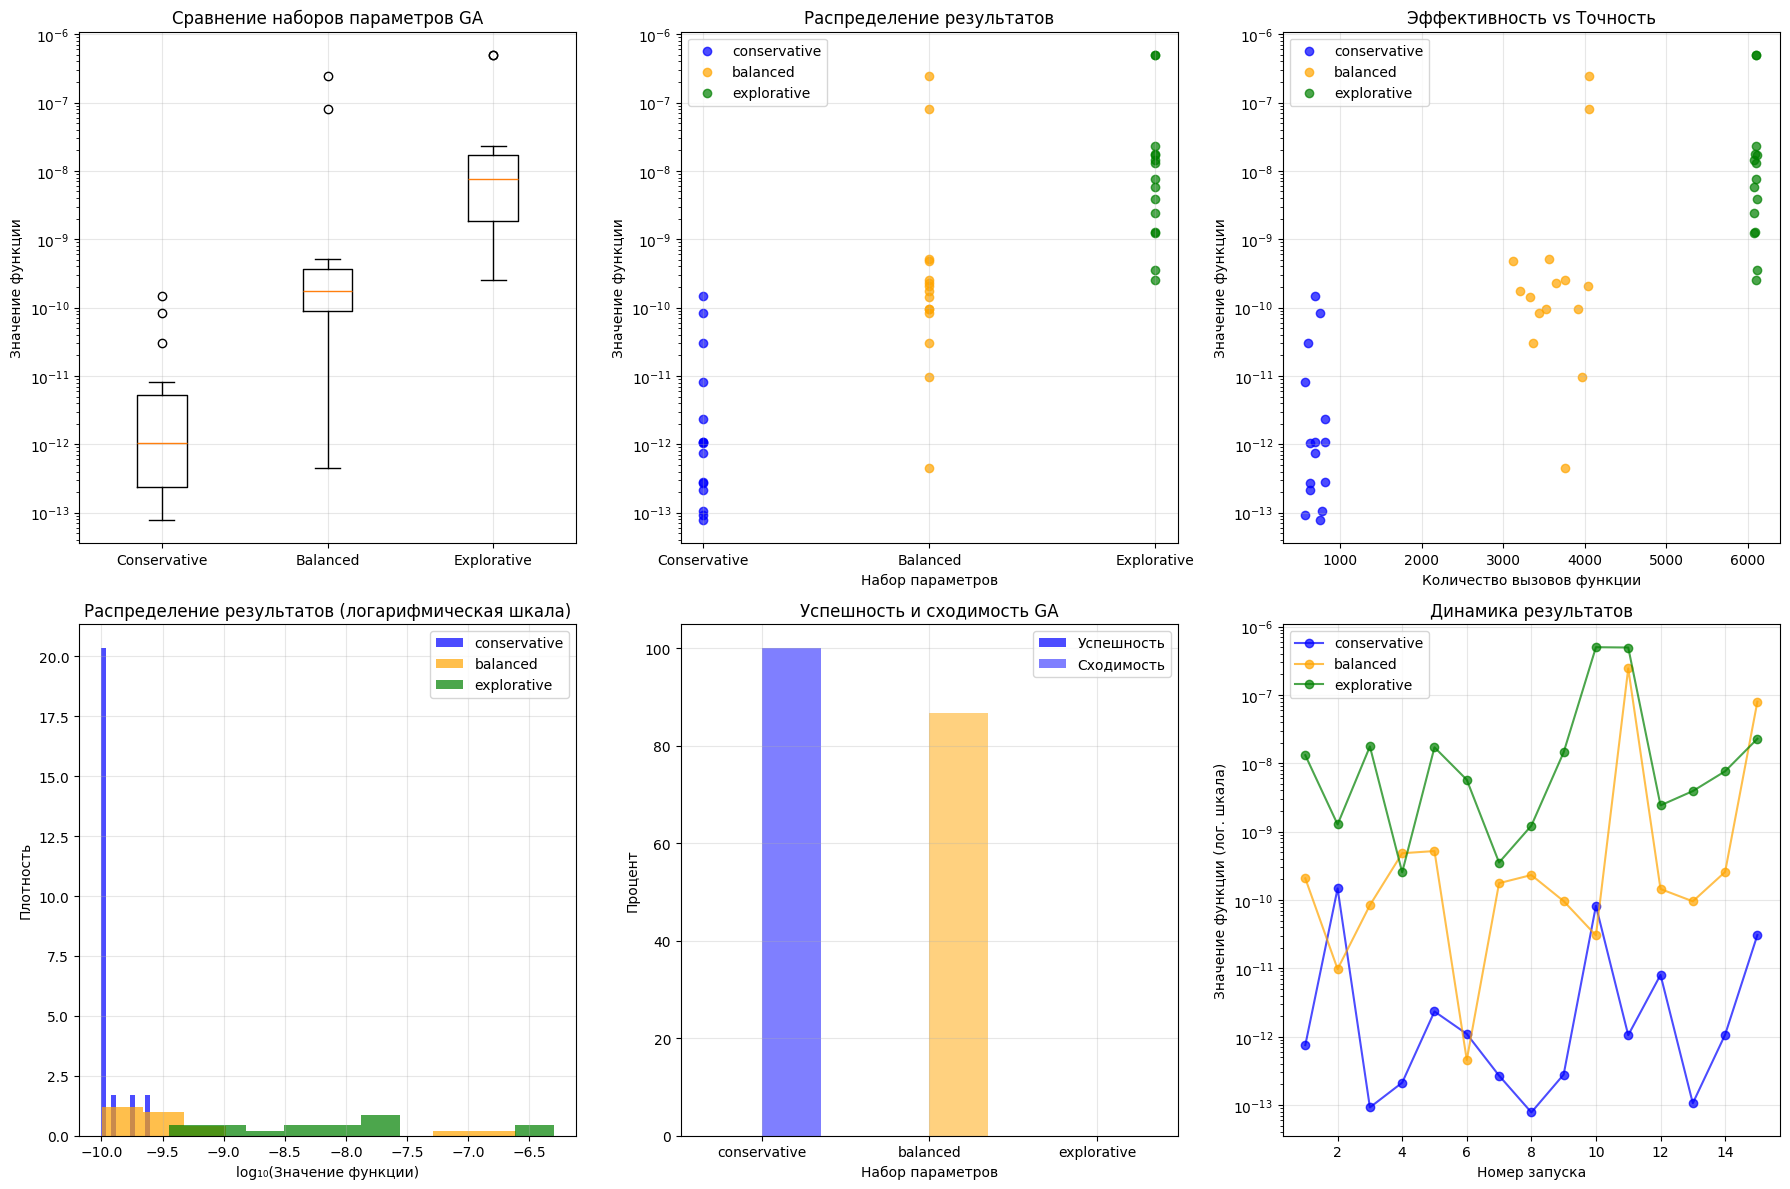

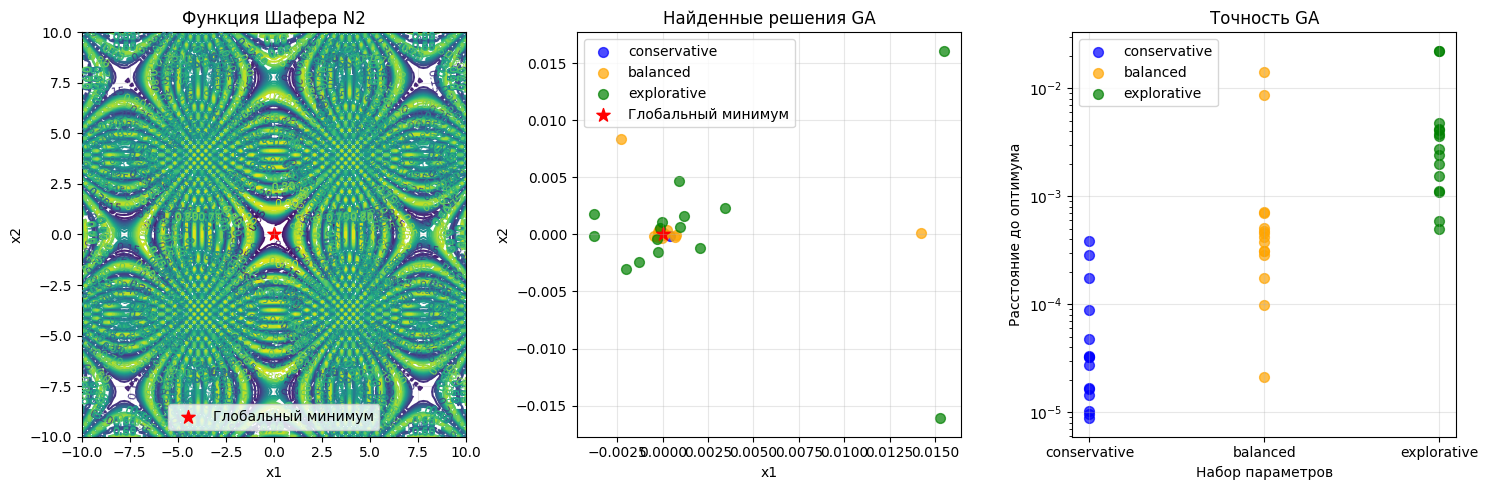


=== ДЕТАЛЬНЫЙ АНАЛИЗ ПАРАМЕТРОВ GA ===

Среднее количество вызовов функции:
  conservative: 697
  balanced: 3649
  explorative: 6096

Точность (среднее расстояние до оптимума):
  conservative: среднее=0.00007909, медиана=0.00003244
  balanced: среднее=0.00185270, медиана=0.00041979
  explorative: среднее=0.00513391, медиана=0.00276109

Анализ по стратегиям мутации:
  conservative (best1bin):
    Лучший результат: 7.81597009e-14
    Мутация: 0.3, Популяция: 15
  balanced (rand1bin):
    Лучший результат: 4.57189842e-13
    Мутация: 0.5, Популяция: 20
  explorative (rand2bin):
    Лучший результат: 2.54411936e-10
    Мутация: 0.8, Популяция: 30

=== РЕКОМЕНДАЦИИ ПО GA ===
1. Все наборы параметров показывают схожую эффективность
2. Выбирайте параметры исходя из ограничений:
   - Ограничены вычисления → conservative
   - Нужна надежность → balanced
   - Сложная функция → explorative

4. Общие рекомендации для GA на функции Шафера N2:
   - Используйте polish=True для финальной полировки
  

In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
from scipy.stats import f_oneway


def schaffer_n2(x):
    x1, x2 = x[0], x[1]
    numerator = np.sin(x1**2 - x2**2)**2 - 0.5
    denominator = (1 + 0.001 * (x1**2 + x2**2))**2
    return 0.5 + numerator / denominator

lower = np.array([-100, -100])
upper = np.array([100, 100])
global_opt = np.array([0.0, 0.0])
global_min_value = schaffer_n2(global_opt)

print("=== ФУНКЦИЯ ШАФЕРА N2 ===")
print(f"Размерность: 2")
print(f"Область определения: [{lower[0]}, {upper[0]}]²")
print(f"Глобальный минимум: f({global_opt}) = {global_min_value:.6f}")


ga_params = {
    'conservative': {
        'maxiter': 100,
        'popsize': 15,
        'mutation': 0.3,
        'recombination': 0.7,
        'strategy': 'best1bin'
    },
    'balanced': {
        'maxiter': 100,
        'popsize': 20,
        'mutation': 0.5,
        'recombination': 0.7,
        'strategy': 'rand1bin'
    },
    'explorative': {
        'maxiter': 100,
        'popsize': 30,
        'mutation': 0.8,
        'recombination': 0.3,
        'strategy': 'rand2bin'
    }
}

def run_ga_with_params(params_dict, n_runs=15):
    results = []
    
    for i in range(n_runs):
        seed = 42 + i
        np.random.seed(seed)
        
        counter = FunctionCallCounter(schaffer_n2)
        
        start_point = np.random.uniform(lower, upper, 2)
        
        bounds = list(zip(lower, upper))
        
        result = differential_evolution(
            counter,
            bounds,
            strategy=params_dict['strategy'],
            maxiter=params_dict['maxiter'],
            popsize=params_dict['popsize'],
            mutation=params_dict['mutation'],
            recombination=params_dict['recombination'],
            seed=seed,
            tol=1e-6,
            atol=1e-8,
            polish=True
        )
        
        global_distance = np.linalg.norm(result.x - global_opt)
        
        results.append({
            'run': i + 1,
            'start_point': start_point.copy(),
            'final_point': result.x.copy(),
            'value': result.fun,
            'call_count': counter.count,
            'global_distance': global_distance,
            'success': global_distance < 1e-6 and result.fun < 1e-6,
            'converged': result.success
        })
    
    return results

print(f"\n=== ЗАПУСК ЭКСПЕРИМЕНТОВ С ГЕНЕТИЧЕСКИМ АЛГОРИТМОМ ===")

all_results = {}
all_values = {}

for param_name, params in ga_params.items():
    print(f"\nЗапуск GA с параметрами '{param_name}':")
    print(f"  Размер популяции: {params['popsize']}")
    print(f"  Мутация: {params['mutation']}")
    print(f"  Кроссовер: {params['recombination']}")
    print(f"  Стратегия: {params['strategy']}")
    
    results = run_ga_with_params(params, n_runs=15)
    all_results[param_name] = results
    
    values = [r['value'] for r in results]
    all_values[param_name] = np.array(values)
    
    successes = sum([r['success'] for r in results])
    converged = sum([r['converged'] for r in results])
    avg_calls = np.mean([r['call_count'] for r in results])
    avg_value = np.mean(values)
    std_value = np.std(values, ddof=1)
    
    print(f"  Успешных запусков: {successes}/15 ({successes/15*100:.1f}%)")
    print(f"  Сошедшихся запусков: {converged}/15 ({converged/15*100:.1f}%)")
    print(f"  Среднее значение функции: {avg_value:.8f}")
    print(f"  Стандартное отклонение: {std_value:.8f}")
    print(f"  Среднее количество вызовов: {avg_calls:.0f}")

results_df_list = []
for param_name, results in all_results.items():
    for result in results:
        results_df_list.append({
            'parameter_set': param_name,
            'run': result['run'],
            'value': result['value'],
            'calls': result['call_count'],
            'distance': result['global_distance'],
            'success': result['success'],
            'converged': result['converged']
        })

results_df = pd.DataFrame(results_df_list)

print(f"\n=== СТАТИСТИЧЕСКИЙ АНАЛИЗ ===")

for param_name in ga_params.keys():
    subset = results_df[results_df['parameter_set'] == param_name]
    print(f"\n{param_name.upper()}:")
    print(f"  Среднее: {subset['value'].mean():.8f}")
    print(f"  Медиана: {subset['value'].median():.8f}")
    print(f"  Стд. откл.: {subset['value'].std(ddof=1):.8f}")
    print(f"  Минимум: {subset['value'].min():.8f}")
    print(f"  Максимум: {subset['value'].max():.8f}")
    print(f"  Q1 (25%): {subset['value'].quantile(0.25):.8f}")
    print(f"  Q3 (75%): {subset['value'].quantile(0.75):.8f}")

conservative_values = all_values['conservative']
balanced_values = all_values['balanced']
explorative_values = all_values['explorative']

f_statistic, p_value = f_oneway(conservative_values, balanced_values, explorative_values)

print(f"\n=== F-ТЕСТ ФИШЕРА ===")
print(f"H0: Средние значения всех групп равны")
print(f"H1: Хотя бы одна группа отличается от других")
print(f"F-статистика: {f_statistic:.6f}")
print(f"P-значение: {p_value:.6f}")
print(f"Уровень значимости: α = 0.05")

if p_value < 0.05:
    print(f"ЗАКЛЮЧЕНИЕ: p < 0.05 → Отвергаем H0")
    print(f"Различия между группами параметров статистически значимы")
    
    means = {
        'conservative': np.mean(conservative_values),
        'balanced': np.mean(balanced_values),
        'explorative': np.mean(explorative_values)
    }
    best_params = min(means.items(), key=lambda x: x[1])
    print(f"Лучший набор параметров: {best_params[0]} (среднее = {best_params[1]:.8f})")
else:
    print(f"ЗАКЛЮЧЕНИЕ: p ≥ 0.05 → Не отвергаем H0")
    print(f"Различия могут быть обусловлены случайными колебаниями")

num_groups = len(ga_params)
total_n = len(conservative_values) * num_groups
between_groups_df = num_groups - 1
within_groups_df = total_n - num_groups

eta_squared = (f_statistic * between_groups_df) / (f_statistic * between_groups_df + within_groups_df)
print(f"\nРазмер эффекта (η²): {eta_squared:.4f}")
if eta_squared < 0.01:
    print("Малый эффект")
elif eta_squared < 0.06:
    print("Средний эффект")
else:
    print("Большой эффект")

cohen_f = np.sqrt(eta_squared / (1 - eta_squared))
print(f"Размер эффекта Коэна (f): {cohen_f:.4f}")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0, 0].boxplot([conservative_values, balanced_values, explorative_values], 
                   labels=['Conservative', 'Balanced', 'Explorative'])
axes[0, 0].set_ylabel('Значение функции')
axes[0, 0].set_title('Сравнение наборов параметров GA')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_yscale('log')

colors = ['blue', 'orange', 'green']
param_names = ['conservative', 'balanced', 'explorative']
for i, (param_name, color) in enumerate(zip(param_names, colors)):
    values = all_values[param_name]
    axes[0, 1].scatter([i] * len(values), values, alpha=0.7, color=color, label=param_name)

axes[0, 1].set_xlabel('Набор параметров')
axes[0, 1].set_ylabel('Значение функции')
axes[0, 1].set_title('Распределение результатов')
axes[0, 1].set_xticks(range(3))
axes[0, 1].set_xticklabels(['Conservative', 'Balanced', 'Explorative'])
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_yscale('log')

for i, param_name in enumerate(param_names):
    subset = results_df[results_df['parameter_set'] == param_name]
    axes[0, 2].scatter(subset['calls'], subset['value'], alpha=0.7, 
                      color=colors[i], label=param_name)

axes[0, 2].set_xlabel('Количество вызовов функции')
axes[0, 2].set_ylabel('Значение функции')
axes[0, 2].set_title('Эффективность vs Точность')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].set_yscale('log')

for i, (param_name, values) in enumerate(all_values.items()):
    log_values = np.log10(np.array(values) + 1e-10)
    axes[1, 0].hist(log_values, bins=10, alpha=0.7, color=colors[i], 
                   label=param_name, density=True)

axes[1, 0].set_xlabel('log₁₀(Значение функции)')
axes[1, 0].set_ylabel('Плотность')
axes[1, 0].set_title('Распределение результатов (логарифмическая шкала)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

success_rates = []
convergence_rates = []
for param_name in param_names:
    subset = results_df[results_df['parameter_set'] == param_name]
    success_rate = subset['success'].mean() * 100
    convergence_rate = subset['converged'].mean() * 100
    success_rates.append(success_rate)
    convergence_rates.append(convergence_rate)

x_pos = np.arange(len(param_names))
width = 0.35

axes[1, 1].bar(x_pos - width/2, success_rates, width, label='Успешность', color=colors, alpha=0.7)
axes[1, 1].bar(x_pos + width/2, convergence_rates, width, label='Сходимость', color=colors, alpha=0.5)
axes[1, 1].set_xlabel('Набор параметров')
axes[1, 1].set_ylabel('Процент')
axes[1, 1].set_title('Успешность и сходимость GA')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(param_names)
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

for i, param_name in enumerate(param_names):
    subset = results_df[results_df['parameter_set'] == param_name]
    runs = subset['run'].values
    values = subset['value'].values
    axes[1, 2].semilogy(runs, values, 'o-', color=colors[i], label=param_name, alpha=0.7)

axes[1, 2].set_xlabel('Номер запуска')
axes[1, 2].set_ylabel('Значение функции (лог. шкала)')
axes[1, 2].set_title('Динамика результатов')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = schaffer_n2([X[i, j], Y[i, j]])

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
contour = plt.contour(X, Y, Z, levels=20)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter([0], [0], color='red', s=100, marker='*', label='Глобальный минимум')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Функция Шафера N2')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
for i, param_name in enumerate(param_names):
    points = np.array([r['final_point'] for r in all_results[param_name]])
    plt.scatter(points[:, 0], points[:, 1], alpha=0.7, color=colors[i], 
               label=f'{param_name}', s=50)

plt.scatter([0], [0], color='red', s=100, marker='*', label='Глобальный минимум')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Найденные решения GA')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
for i, param_name in enumerate(param_names):
    points = np.array([r['final_point'] for r in all_results[param_name]])
    distances = [np.linalg.norm(point - global_opt) for point in points]
    plt.scatter([i] * len(distances), distances, alpha=0.7, color=colors[i], 
               label=param_name, s=50)

plt.xlabel('Набор параметров')
plt.ylabel('Расстояние до оптимума')
plt.title('Точность GA')
plt.xticks(range(3), param_names)
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n=== ДЕТАЛЬНЫЙ АНАЛИЗ ПАРАМЕТРОВ GA ===")

avg_calls = {}
for param_name in param_names:
    subset = results_df[results_df['parameter_set'] == param_name]
    avg_calls[param_name] = subset['calls'].mean()
    
print(f"\nСреднее количество вызовов функции:")
for param_name, calls in avg_calls.items():
    print(f"  {param_name}: {calls:.0f}")

print(f"\nТочность (среднее расстояние до оптимума):")
for param_name in param_names:
    subset = results_df[results_df['parameter_set'] == param_name]
    avg_distance = subset['distance'].mean()
    median_distance = subset['distance'].median()
    print(f"  {param_name}: среднее={avg_distance:.8f}, медиана={median_distance:.8f}")

print(f"\nАнализ по стратегиям мутации:")
for param_name, params in ga_params.items():
    subset = results_df[results_df['parameter_set'] == param_name]
    best_result = subset.loc[subset['value'].idxmin()]
    print(f"  {param_name} ({params['strategy']}):")
    print(f"    Лучший результат: {best_result['value']:.8e}")
    print(f"    Мутация: {params['mutation']}, Популяция: {params['popsize']}")

print(f"\n=== ИТОГОВАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ ===")
summary_table = pd.DataFrame({
    'Параметры': param_names,
    'Стратегия': [ga_params[name]['strategy'] for name in param_names],
    'Популяция': [ga_params[name]['popsize'] for name in param_names],
    'Мутация': [ga_params[name]['mutation'] for name in param_names],
    'Среднее значение': [np.mean(all_values[name]) for name in param_names],
    'Стд. отклонение': [np.std(all_values[name], ddof=1) for name in param_names],
    'Успешность (%)': [results_df[results_df['parameter_set'] == name]['success'].mean() * 100 
                       for name in param_names],
    'Сходимость (%)': [results_df[results_df['parameter_set'] == name]['converged'].mean() * 100 
                       for name in param_names],
    'Ср. вызовы': [results_df[results_df['parameter_set'] == name]['calls'].mean() 
                   for name in param_names]
})

print(summary_table.to_string(index=False, float_format='%.6f'))

print(f"\nГлобальный минимум функции Шафера N2: {global_min_value:.6f}")

https://stackoverflow.com/a/77418170

Данные операций:
  name  job  machine  cost
0   o1    1        1     5
1   o2    1        2     3
2   o3    1        3     2
3   o4    1        4     3
4   o5    1        5     2
5   o6    1        6     1
6   o7    1        7     2

Матрица расстояний TSP:
     0    1    2    3    4    5    6
0  0.0  8.0  7.0  8.0  7.0  6.0  7.0
1  8.0  0.0  5.0  6.0  5.0  4.0  5.0
2  7.0  5.0  0.0  5.0  4.0  3.0  4.0
3  8.0  6.0  5.0  0.0  5.0  4.0  5.0
4  7.0  5.0  4.0  5.0  0.0  3.0  4.0
5  6.0  4.0  3.0  4.0  3.0  0.0  3.0
6  7.0  5.0  4.0  5.0  4.0  3.0  0.0

Точное решение TSP:
Путь: [0, 1, 2, 3, 4, 5, 6]
Расстояние: 36

Общее время сборки одного изделия: 18 минут

Расписание:
  job machine  from  to
0   1       1     0   5
1   1       2     5   8
2   1       3     8  10
3   1       4    10  13
4   1       5    13  15
5   1       6    15  16
6   1       7    16  18


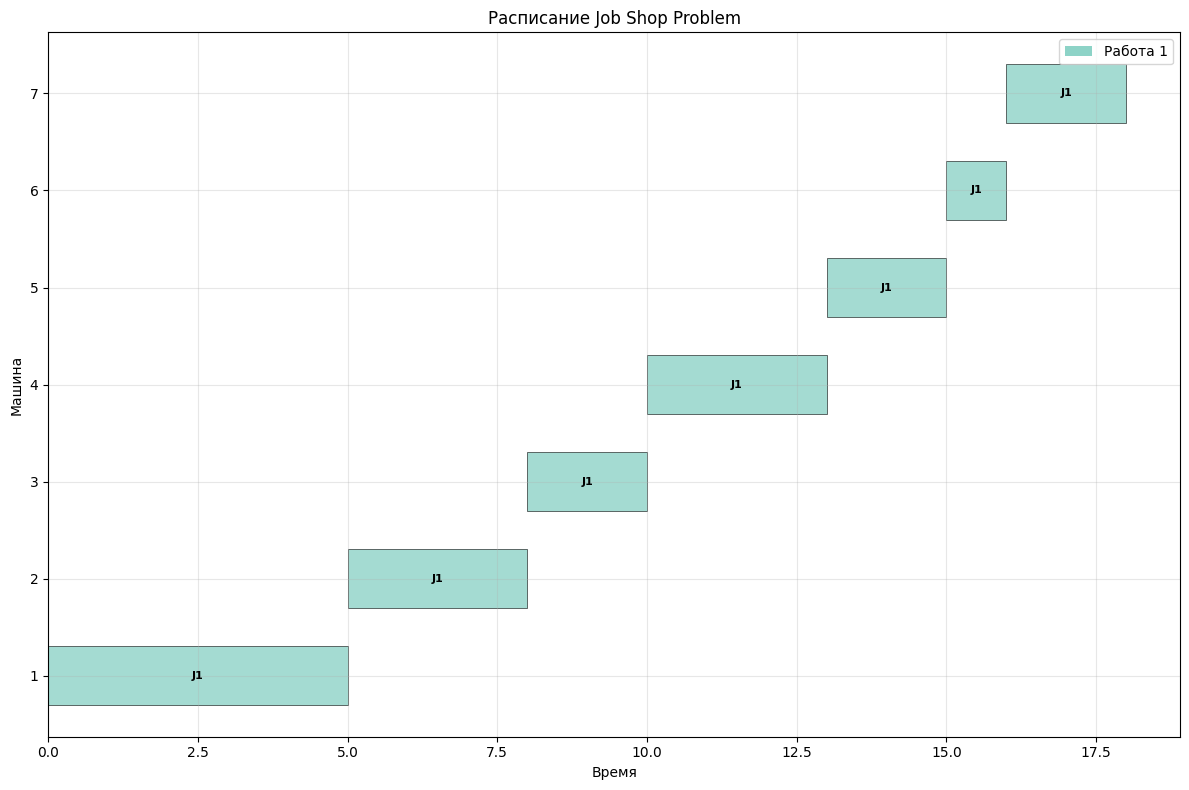

In [361]:
from JSP import make_task_data, jsp_to_tsp, tsp_to_jsp_optimized, plot_jsp_schedule
import pandas as pd
from python_tsp.exact import solve_tsp_dynamic_programming
from python_tsp.heuristics import solve_tsp_simulated_annealing

operations_data = pd.DataFrame({
    'name': ['o1', 'o2', 'o3', 'o4', 'o5', 'o6', 'o7'],
    'job': [1, 1, 1, 1, 1, 1, 1],
    'machine': [1, 2, 3, 4, 5, 6, 7],
    'cost': [5, 3, 2, 3, 2, 1, 2]
})

print("Данные операций:")
print(operations_data)

jsp_data_1 = make_task_data(1, 7, operations_data['cost'].values)

tsp_matrix_1 = jsp_to_tsp(jsp_data_1)

print(f"\nМатрица расстояний TSP:")
print(pd.DataFrame(tsp_matrix_1))

distance_matrix = tsp_matrix_1.astype(int)

try:
    path_exact, distance_exact = solve_tsp_dynamic_programming(distance_matrix)
    print(f"\nТочное решение TSP:")
    print(f"Путь: {path_exact}")
    print(f"Расстояние: {distance_exact}")
    optimal_path = path_exact
except:
    path_heuristic, distance_heuristic = solve_tsp_simulated_annealing(distance_matrix)
    print(f"\nЭвристическое решение TSP:")
    print(f"Путь: {path_heuristic}")
    print(f"Расстояние: {distance_heuristic}")
    optimal_path = path_heuristic

schedule_1 = tsp_to_jsp_optimized(jsp_data_1, optimal_path)

print(f"\nОбщее время сборки одного изделия: {schedule_1['cost']} минут")
print("\nРасписание:")
print(schedule_1['schedule'])

plot_jsp_schedule(schedule_1['schedule'])

=== ПРОИЗВОДСТВО АЛЬМА-МЕТРОВ ===
Операции сборки:
1. Установка микроконтроллера (ESP32-WROOM-32D/E) - 5 минут
2. Пайка датчика температуры/влажности (SHT20 или DHT22) - 3 минут
3. Подключение реле (SRD-12VDC-SL) - 2 минут
4. Монтаж разъема питания (DC Jack) - 3 минут
5. Установка светодиодов - 2 минут
6. Добавление кнопки Reset - 1 минут
7. Установка аудио разъема 3.5 мм - 2 минут

=== СБОРКА ОДНОГО ИЗДЕЛИЯ ===
  name  job  machine  cost
0   o1    1        1     5
1   o2    1        2     3
2   o3    1        3     2
3   o4    1        4     3
4   o5    1        5     2
5   o6    1        6     1
6   o7    1        7     2

Матрица расстояний TSP (1 изделие):
     o1   o2   o3   o4   o5   o6   o7
o1  0.0  8.0  7.0  8.0  7.0  6.0  7.0
o2  8.0  0.0  5.0  6.0  5.0  4.0  5.0
o3  7.0  5.0  0.0  5.0  4.0  3.0  4.0
o4  8.0  6.0  5.0  0.0  5.0  4.0  5.0
o5  7.0  5.0  4.0  5.0  0.0  3.0  4.0
o6  6.0  4.0  3.0  4.0  3.0  0.0  3.0
o7  7.0  5.0  4.0  5.0  4.0  3.0  0.0

Оптимальный путь: [0, 1, 6

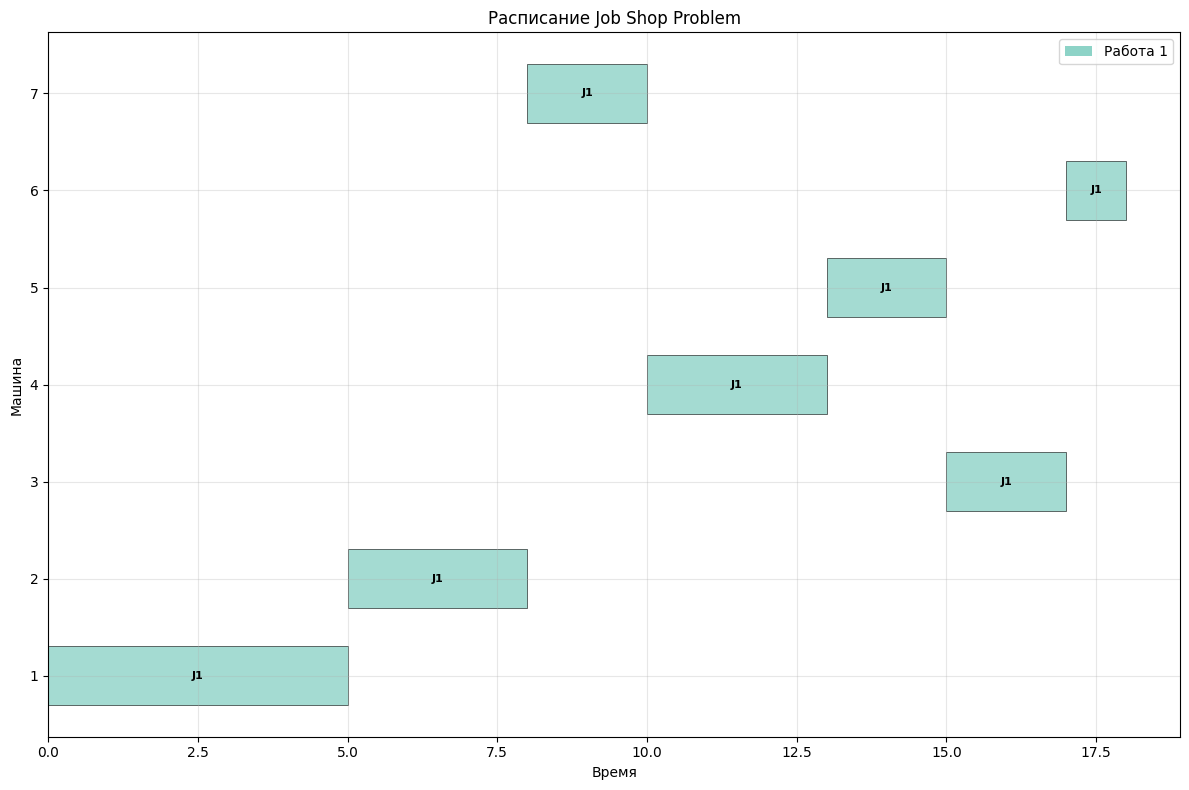


=== СБОРКА 10 ИЗДЕЛИЙ ===
Всего операций: 70
   name  job  machine  cost
0    o1    1        1     5
1    o2    1        2     3
2    o3    1        3     2
3    o4    1        4     3
4    o5    1        5     2
5    o6    1        6     1
6    o7    1        7     2
7    o8    2        1     5
8    o9    2        2     3
9   o10    2        3     2
10  o11    2        4     3
11  o12    2        5     2
12  o13    2        6     1
13  o14    2        7     2

Размер матрицы TSP: (70, 70)
Общее время сборки 10 изделий: 70 минут
Среднее время на изделие: 7.0 минут

Расписание (первые 20 операций):
   job machine  from  to
0    1       1     0   5
1    5       4     0   3
2   10       2     0   3
3    3       1     5  10
4    1       4     5   8
5    6       2     3   6
6    5       1    10  15
7    8       2     6   9
8   10       1    15  20
9    3       4    10  13
10   9       1    20  25
11   6       4    13  16
12   8       1    25  30
13   1       2     9  12
14  10       4    2

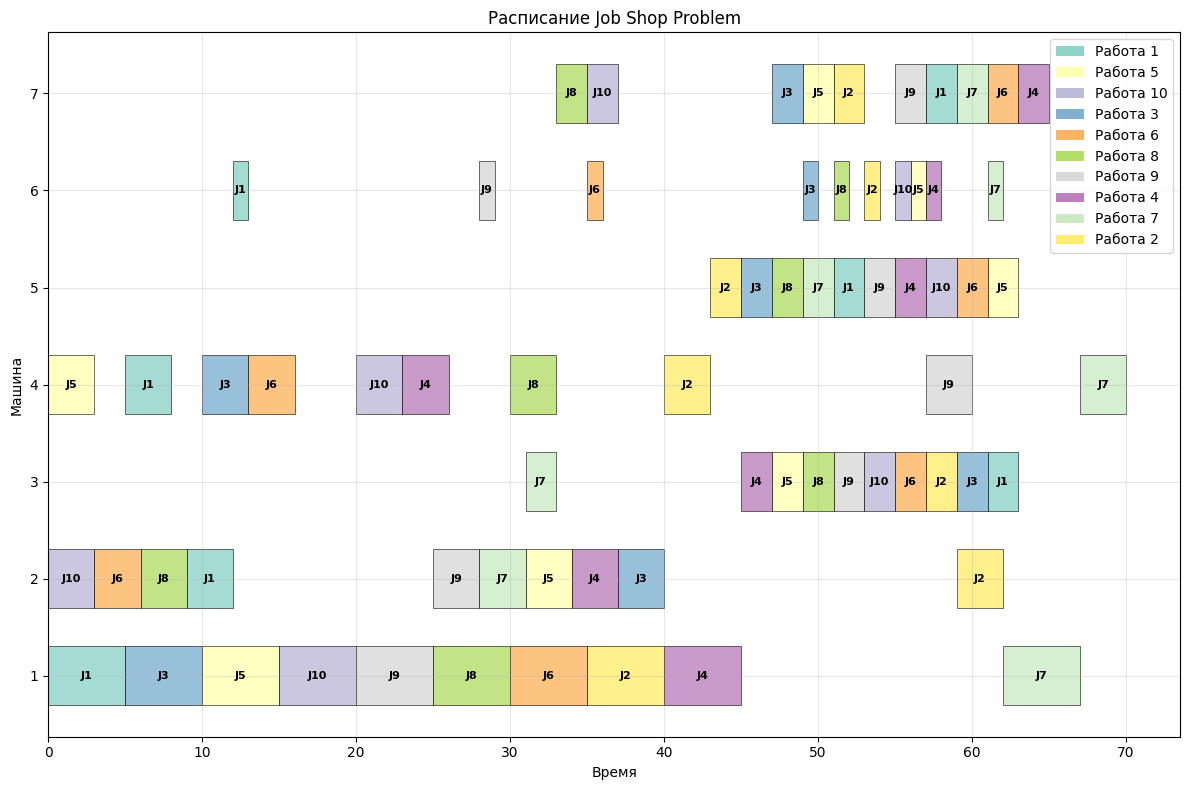


=== СБОРКА 20 ИЗДЕЛИЙ ===
Всего операций: 140
Размер матрицы TSP: (140, 140)
Общее время сборки 20 изделий: 125 минут
Среднее время на изделие: 6.2 минут

Расписание (первые 30 операций):
   job machine  from  to
0    1       1     0   5
1    5       2     0   3
2    8       1     5  10
3    1       2     5   8
4    6       1    10  15
5   11       2     8  11
6   20       1    15  20
7   16       2    11  14
8   15       4     0   3
9    9       1    20  25
10  18       4     3   6
11   4       1    25  30
12  13       4     6   9
13   4       3    30  32
14   5       5     3   5
15  13       7     9  11
16  11       3    32  34
17   7       5     5   7
18   2       7    11  13
19  15       5     7   9
20  17       7    13  15
21   5       3    34  36
22  10       5     9  11
23   6       7    15  17
24  14       5    11  13
25   3       3    36  38
26  10       6    11  12
27   8       5    13  15
28  14       7    17  19
29   2       3    38  40


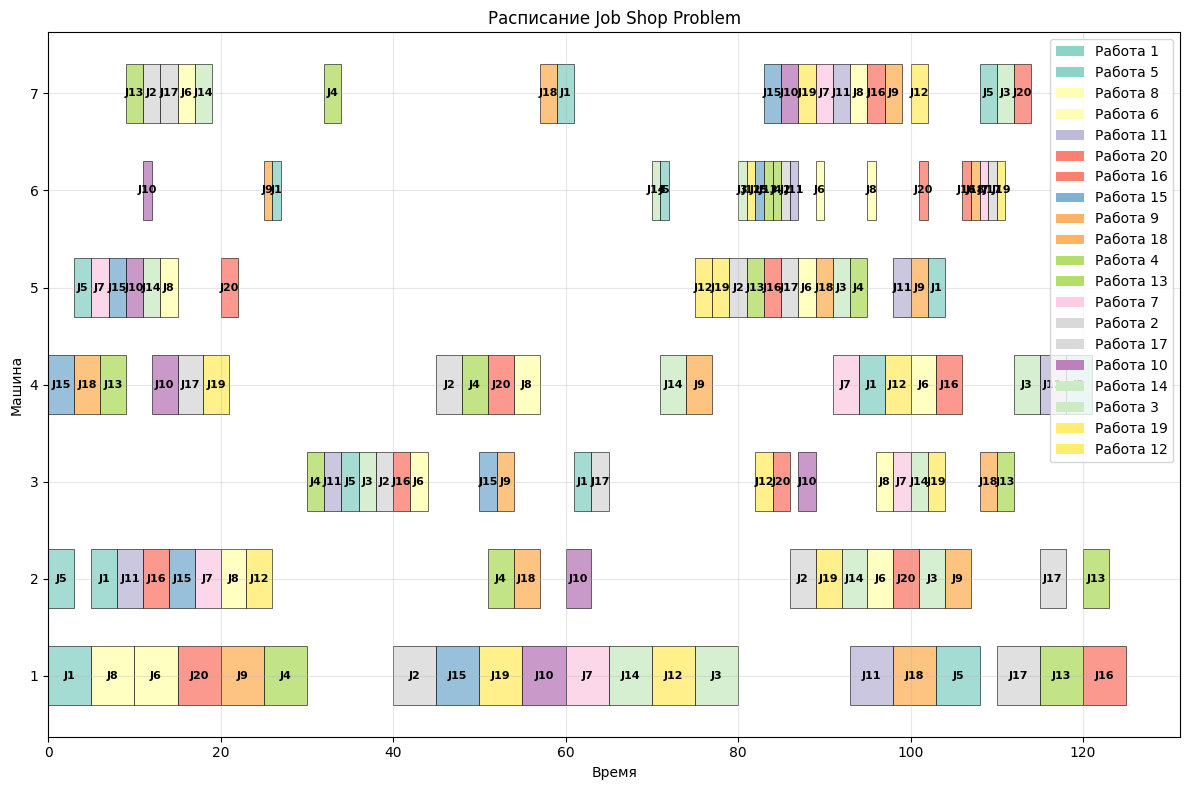


=== СРАВНЕНИЕ ЭФФЕКТИВНОСТИ ===
1 изделие:  18 минут
10 изделий: 70 минут (7.0 мин/изделие)
20 изделий: 125 минут (6.2 мин/изделие)

Повышение эффективности:
10 изделий: 61.1%
20 изделий: 65.3%

Загрузка машин (%):
Машина | 10 изделий | 20 изделий
-------|------------|------------
   1   |     71.4   |     80.0
   2   |     42.9   |     48.0
   3   |     28.6   |     32.0
   4   |     42.9   |     48.0
   5   |     28.6   |     32.0
   6   |     14.3   |     16.0
   7   |     28.6   |     32.0

Средняя загрузка:
10 изделий: 36.7%
20 изделий: 41.1%


In [362]:
from JSP import make_task_data, jsp_to_tsp, tsp_to_jsp_optimized, plot_jsp_schedule
import numpy as np
import pandas as pd
from python_tsp.heuristics import solve_tsp_simulated_annealing, solve_tsp_local_search

operations_costs = [5, 3, 2, 3, 2, 1, 2]
operations_names = [
    'Установка микроконтроллера (ESP32-WROOM-32D/E)',
    'Пайка датчика температуры/влажности (SHT20 или DHT22)', 
    'Подключение реле (SRD-12VDC-SL)',
    'Монтаж разъема питания (DC Jack)',
    'Установка светодиодов',
    'Добавление кнопки Reset',
    'Установка аудио разъема 3.5 мм'
]

print("=== ПРОИЗВОДСТВО АЛЬМА-МЕТРОВ ===")
print("Операции сборки:")
for i, (name, cost) in enumerate(zip(operations_names, operations_costs)):
    print(f"{i+1}. {name} - {cost} минут")

print("\n=== СБОРКА ОДНОГО ИЗДЕЛИЯ ===")

operations_data_1 = pd.DataFrame({
    'name': [f'o{i+1}' for i in range(7)],
    'job': [1] * 7,
    'machine': list(range(1, 8)),
    'cost': operations_costs
})

print(operations_data_1)

jsp_data_1 = make_task_data(1, 7, np.array(operations_costs))
tsp_matrix_1 = jsp_to_tsp(jsp_data_1)

print(f"\nМатрица расстояний TSP (1 изделие):")
print(pd.DataFrame(tsp_matrix_1, 
                   index=[f'o{i+1}' for i in range(7)],
                   columns=[f'o{i+1}' for i in range(7)]))

path_1, distance_1 = solve_tsp_simulated_annealing(tsp_matrix_1.astype(int))
schedule_1 = tsp_to_jsp_optimized(jsp_data_1, path_1)

print(f"\nОптимальный путь: {path_1}")
print(f"Общее время сборки одного изделия: {schedule_1['cost']} минут")
print("\nРасписание:")
print(schedule_1['schedule'])

plot_jsp_schedule(schedule_1['schedule'])

print("\n=== СБОРКА 10 ИЗДЕЛИЙ ===")

operations_data_10 = pd.DataFrame({
    'name': [f'o{i+1}' for i in range(70)],
    'job': np.repeat(range(1, 11), 7),
    'machine': np.tile(range(1, 8), 10),
    'cost': np.tile(operations_costs, 10)
})

print(f"Всего операций: {len(operations_data_10)}")
print(operations_data_10.head(14))

cost_matrix_10 = np.tile(operations_costs, 10).reshape(10, 7)
jsp_data_10 = make_task_data(10, 7, cost_matrix_10)
tsp_matrix_10 = jsp_to_tsp(jsp_data_10)

print(f"\nРазмер матрицы TSP: {tsp_matrix_10.shape}")

path_10, distance_10 = solve_tsp_simulated_annealing(tsp_matrix_10.astype(int))
schedule_10 = tsp_to_jsp_optimized(jsp_data_10, path_10)

print(f"Общее время сборки 10 изделий: {schedule_10['cost']} минут")
print(f"Среднее время на изделие: {schedule_10['cost']/10:.1f} минут")

print("\nРасписание (первые 20 операций):")
print(schedule_10['schedule'].head(20))

plot_jsp_schedule(schedule_10['schedule'])

print("\n=== СБОРКА 20 ИЗДЕЛИЙ ===")

operations_data_20 = pd.DataFrame({
    'name': [f'o{i+1}' for i in range(140)],
    'job': np.repeat(range(1, 21), 7),
    'machine': np.tile(range(1, 8), 20),
    'cost': np.tile(operations_costs, 20)
})

print(f"Всего операций: {len(operations_data_20)}")

cost_matrix_20 = np.tile(operations_costs, 20).reshape(20, 7)
jsp_data_20 = make_task_data(20, 7, cost_matrix_20)
tsp_matrix_20 = jsp_to_tsp(jsp_data_20)

print(f"Размер матрицы TSP: {tsp_matrix_20.shape}")

path_20, distance_20 = solve_tsp_simulated_annealing(tsp_matrix_20.astype(int))
schedule_20 = tsp_to_jsp_optimized(jsp_data_20, path_20)

print(f"Общее время сборки 20 изделий: {schedule_20['cost']} минут")
print(f"Среднее время на изделие: {schedule_20['cost']/20:.1f} минут")

print("\nРасписание (первые 30 операций):")
print(schedule_20['schedule'].head(30))

plot_jsp_schedule(schedule_20['schedule'])

print("\n=== СРАВНЕНИЕ ЭФФЕКТИВНОСТИ ===")
print(f"1 изделие:  {schedule_1['cost']} минут")
print(f"10 изделий: {schedule_10['cost']} минут ({schedule_10['cost']/10:.1f} мин/изделие)")
print(f"20 изделий: {schedule_20['cost']} минут ({schedule_20['cost']/20:.1f} мин/изделие)")

efficiency_improvement_10 = (schedule_1['cost'] - schedule_10['cost']/10) / schedule_1['cost'] * 100
efficiency_improvement_20 = (schedule_1['cost'] - schedule_20['cost']/20) / schedule_1['cost'] * 100

print(f"\nПовышение эффективности:")
print(f"10 изделий: {efficiency_improvement_10:.1f}%")
print(f"20 изделий: {efficiency_improvement_20:.1f}%")

utilization_10 = []
utilization_20 = []

for machine in range(1, 8):
    machine_ops_10 = schedule_10['schedule'][schedule_10['schedule']['machine'] == machine]
    machine_ops_20 = schedule_20['schedule'][schedule_20['schedule']['machine'] == machine]
    
    total_work_time_10 = (machine_ops_10['to'] - machine_ops_10['from']).sum()
    total_work_time_20 = (machine_ops_20['to'] - machine_ops_20['from']).sum()
    
    util_10 = total_work_time_10 / schedule_10['cost'] * 100
    util_20 = total_work_time_20 / schedule_20['cost'] * 100
    
    utilization_10.append(util_10)
    utilization_20.append(util_20)

print(f"\nЗагрузка машин (%):")
print("Машина | 10 изделий | 20 изделий")
print("-------|------------|------------")
for i in range(7):
    print(f"   {i+1}   |   {utilization_10[i]:6.1f}   |   {utilization_20[i]:6.1f}")

print(f"\nСредняя загрузка:")
print(f"10 изделий: {np.mean(utilization_10):.1f}%")
print(f"20 изделий: {np.mean(utilization_20):.1f}%")